# Lab 8.3.3 Bagging and Random Forests

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_score

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading the dataset
boston_data = load_boston()
boston = pd.DataFrame(boston_data.data,columns = boston_data['feature_names'])
boston['MEDV'] = boston_data['target']
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Again, i would advice you to get familier with the data, since its an inbuilt dataset, we can use boston_data.DESCR to get mode information

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000

- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

soucrs - [https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html]

Its better that we go through the above list once, so that we know what we are dealing with here.

In [3]:
#splitting the data into train and test 
X_train,X_test,y_train,y_test = train_test_split(boston.drop('MEDV',axis = 1),boston['MEDV'],test_size = 0.5,random_state = 0)
print(X_train.shape,X_test.shape)

(253, 13) (253, 13)


## Bagging
- We have learnt it earlier that random forest is a special case of bagging algorithms, and that random forest uses a subspace of featurs that are considered for each split. Generally random forest considers m features at each split, out of total feature space of p features. 
- Usually the value of m is sqrt(p), but if m = p, it becomes same as baaging.
- Although there is a separate library for bagging in sklearn, we are going to follow the same approach in the book, and use random forests with m = p.

In random forests, we use max_features paramter to control the number of features considered for each split, so, for m = p, we just pass max_features as None, or the size of predictor space - 
for more on this check out the max_features paramtere from here - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [4]:
bagging = RandomForestRegressor(max_features=None)# or we can pass max_features = len(X_train.columns) = 13
bagging.fit(X_train,y_train)
print('Training score ',bagging.score(X_train,y_train))
print('Test Error ',bagging.score(X_test,y_test))

Training score  0.9828811138262538
Test Error  0.7896477543538729


Here the score means the r2 score
So, we can see there is a vast imporvement from the score we were getting the last time when we used decision tree regressor

### NOTE: In book, the errors are mentioned in RSS, which can be calculated by sklearn.metrics.mean_squared_error than multiplying it by number of observations, i have used R2 score here. (Doesn;t have any effect in comparison though)

## Random Forests

In [5]:
rf = RandomForestRegressor(max_features = 6) # same as book
rf.fit(X_train,y_train)
print('Training score ',rf.score(X_train,y_train))
print('Test Error ',rf.score(X_test,y_test))

Training score  0.9863168780462905
Test Error  0.7786275195959232


Here we are getting more improved results than bagging. 

## Feature importance

<AxesSubplot:>

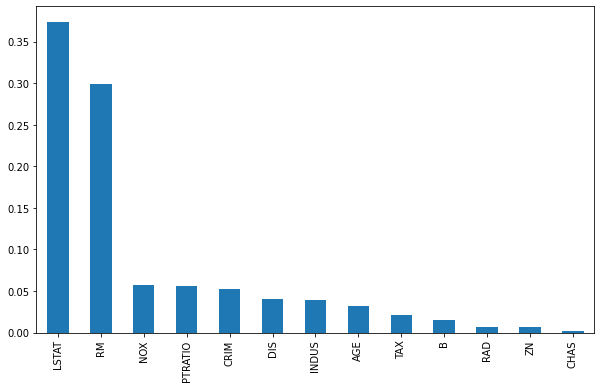

In [6]:
pd.Series(rf.feature_importances_,index = X_train.columns).sort_values(ascending=False).plot.bar(figsize = (10,6))

From the above graph we can see that RM and LSTAT are by far the most important features of all.

# Happy Learning :)